<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi Elvis! Thanks for submitting your project on gold recovery prediction! You walked through the end-to-end pipeline clearly and with solid structure. Here's your review:

---

**✅ Strengths**

- Excellent **project organization** — your objectives and section labels were well stated and easy to follow.
- Good **handling of missing features** in the test set. You ensured modeling compatibility while preserving targets for evaluation.
- Your **sMAPE and final_sMAPE implementations** are correct and follow best practices.
- Great visualizations! The histograms and boxplots for metal concentrations and particle sizes gave strong insights into the purification process.
- You **tested multiple models** and used `cross_val_score` properly to compare their performance. Great use of KFold.
- You **aligned predictions and targets correctly** and evaluated your best model on the test set using the weighted sMAPE.

---

**🛠️ Areas for Improvement**

- Be careful with **redefining functions** (e.g., `smape`) in multiple places — this can be confusing and error-prone. Consider defining utility functions once at the top.
- For clarity and reproducibility, add a **random_state** to all models — not just the `RandomForestRegressor` and `DecisionTreeRegressor`.
- You calculated final test set sMAPE correctly, but avoid **repeating `fillna(method='ffill')`** too many times — it can lead to silent data overwrites if not clearly scoped.
- Your summary could include **quantitative test sMAPE results** more explicitly in the final markdown cell for better reader recall.

---

**📌 Code Tip: sMAPE Debugging and Visualization**

To better understand how your model performs across both targets:

<code>
# Plot residuals
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(y_test_rougher, rougher_predictions, alpha=0.5)
plt.title("Rougher Recovery: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
</code>
<code>
plt.subplot(1,2,2)
plt.scatter(y_test_final, final_predictions, alpha=0.5)
plt.title("Final Recovery: Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.grid(True)
plt.tight_layout()
plt.show()
</code>
    
You’ve done a strong job implementing all the required tasks and modeling steps. Great work identifying the best model and presenting insights that would be valuable to a business team. Keep up the great work, Elvis! 💡👏
    
**Status: approved**

# SPRINT 10: INTEGRATED PROJECT 2
## PROJECT TITLE: GOLD RECOVERY PREDICTION
## OBJECTIVES:
* Prepare Data: Load, inspect, verify recovery calculation (MAE), analyze missing test features, preprocess data.
* Analyze Data: Track metal concentrations by stage, compare feed particle sizes, assess total concentrations for anomalies and remove them.
* Build Model: Define sMAPE, train and cross-validate models, select best model, test on the test set, report findings.

In [61]:
# Importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_absolute_error

## PREPARING THE DATA
### Open the files and look into the data.

In [62]:
# loading the data
df_train = pd.read_csv('/datasets/gold_recovery_train.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [63]:
df_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [64]:
# Remove date column
df_train = df_train.drop('date', axis =1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         16788 non-null  float64
 1   final.output.concentrate_pb                         16788 non-null  float64
 2   final.output.concentrate_sol                        16490 non-null  float64
 3   final.output.concentrate_au                         16789 non-null  float64
 4   final.output.recovery                               15339 non-null  float64
 5   final.output.tail_ag                                16794 non-null  float64
 6   final.output.tail_pb                                16677 non-null  float64
 7   final.output.tail_sol                               16715 non-null  float64
 8   final.output.tail_au                                16794 non-null  float64


In [65]:
df_train.shape

(16860, 86)

In [66]:
df_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [67]:
df_test = df_test.drop('date', axis =1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5554 non-null   float64
 1   primary_cleaner.input.depressant            5572 non-null   float64
 2   primary_cleaner.input.feed_size             5856 non-null   float64
 3   primary_cleaner.input.xanthate              5690 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5840 non-null   float64
 10  primary_clea

In [68]:
df_test.shape

(5856, 52)

In [69]:
df_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [70]:
df_full = df_full.drop('date', axis =1)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         22627 non-null  float64
 1   final.output.concentrate_pb                         22629 non-null  float64
 2   final.output.concentrate_sol                        22331 non-null  float64
 3   final.output.concentrate_au                         22630 non-null  float64
 4   final.output.recovery                               20753 non-null  float64
 5   final.output.tail_ag                                22633 non-null  float64
 6   final.output.tail_pb                                22516 non-null  float64
 7   final.output.tail_sol                               22445 non-null  float64
 8   final.output.tail_au                                22635 non-null  float64


In [71]:
df_full.shape

(22716, 86)

### Checking  that recovery is calculated correctly.

In [72]:
# checking missing values for the rougher.output.recovery that is used to do the calculation
print(df_train['rougher.output.recovery'].isnull().sum())

2573


In [73]:
# Dropping missing values since MAE cannot be calculated with missing values
df_train = df_train.dropna(subset=['rougher.output.recovery'])
print(f"Number of rows after dropping NaNs: {len(df_train)}")

Number of rows after dropping NaNs: 14287


In [74]:
# 1.2 Check that recovery is calculated correctly.

# Function to calculate recovery
def calculate_recovery(row):
    C = row['rougher.output.concentrate_au']
    F = row['rougher.input.feed_au']
    T = row['rougher.output.tail_au']
    if F == 0 or (C - T) == 0:
        return 0
    recovery = (C * (F - T)) / (F * (C - T)) * 100
    return recovery

# Calculate the recovery for the training set
df_train['rougher.output.recovery_calculated'] = df_train.apply(calculate_recovery, axis=1)

mae = mean_absolute_error(df_train['rougher.output.recovery'], df_train['rougher.output.recovery_calculated'])
print(f'Mean Absolute Error between calculated and actual rougher recovery: {mae:.4f}')

# Display some rows to compare
print("\nComparison of actual and calculated rougher recovery:")
print(df_train[['rougher.output.recovery', 'rougher.output.recovery_calculated']].head())

Mean Absolute Error between calculated and actual rougher recovery: 0.0000

Comparison of actual and calculated rougher recovery:
   rougher.output.recovery  rougher.output.recovery_calculated
0                87.107763                           87.107763
1                86.843261                           86.843261
2                86.842308                           86.842308
3                87.226430                           87.226430
4                86.688794                           86.688794


**Both values are the same**

### Analyze the features not available in the test set.

In [75]:
# Identify columns present in training but not in test
missing_cols = set(df_train.columns) - set(df_test.columns)
print("Columns missing in the test set:")
print(missing_cols)

# Determine the data types of the missing columns
print("\nData types of the missing columns:")
print(df_train[list(missing_cols)].dtypes)

Columns missing in the test set:
{'primary_cleaner.output.concentrate_pb', 'rougher.calculation.au_pb_ratio', 'final.output.tail_sol', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'final.output.tail_ag', 'rougher.output.concentrate_pb', 'final.output.concentrate_au', 'rougher.output.tail_sol', 'rougher.output.recovery', 'final.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.recovery_calculated', 'primary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_ag', 'secondary_cleaner.output.tail_sol', 'final.output.tail_pb', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.t

* Target Variables Missing: final.output.recovery and rougher.output.recovery are absent (as expected for prediction).
* Output Data Missing: Concentrations and tailing measurements from various processing stages are not in the test set.
* Calculated Features Missing: Engineered features relying on output data are also absent.
rougher.output.recovery_calculated Missing: This was your own calculation, not in the raw test data.
* Implication for Modeling: Train your models only on features present in the test set to enable prediction.
* Prediction Targets: Your model needs to predict rougher.output.recovery and final.output.recovery

In [76]:
for col in missing_cols:
    df_test[col] = np.nan 

print(f"Training data shape: {df_train.shape}")
print()
print(f"Test data shape after adding columns: {df_test.shape}")
print()
print(f"Missing values in added columns of test set:\n{df_test[missing_cols].isnull().sum()}")

Training data shape: (14287, 87)

Test data shape after adding columns: (5856, 87)

Missing values in added columns of test set:
primary_cleaner.output.concentrate_pb                 5856
rougher.calculation.au_pb_ratio                       5856
final.output.tail_sol                                 5856
primary_cleaner.output.tail_ag                        5856
rougher.output.tail_ag                                5856
rougher.calculation.floatbank11_sulfate_to_au_feed    5856
rougher.calculation.sulfate_to_au_concentrate         5856
primary_cleaner.output.concentrate_ag                 5856
rougher.output.tail_au                                5856
primary_cleaner.output.concentrate_au                 5856
final.output.concentrate_pb                           5856
primary_cleaner.output.concentrate_sol                5856
final.output.tail_ag                                  5856
rougher.output.concentrate_pb                         5856
final.output.concentrate_au                  

**I chose add the columns that are present in the training set but missing in the test set from your training data.**

### Performing data preprocessing.

In [77]:
# Identify target features
target_rougher = 'rougher.output.recovery'
target_final = 'final.output.recovery'
target_cols = [target_rougher, target_final]

# Identify features available in the test set
features_test = df_test.columns

# Select features and target variables for training
features_train = [col for col in df_train.columns if col in features_test]
df_train_features = df_train[features_train].copy()
df_train_target = df_train[target_cols].copy()

# Add target variables to the test set (from the full dataset) for evaluation later
df_test = df_test.merge(df_full[target_cols], how='left', left_index=True, right_index=True)

# Handle missing values using forward fill
df_train_features = df_train_features.fillna(method='ffill')
df_train_target = df_train_target.fillna(method='ffill')
df_test_processed = df_test.fillna(method='ffill')

print("\nProcessed training features info:")
df_train_features.info()


Processed training features info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14287 non-null  float64
 1   final.output.concentrate_pb                         14287 non-null  float64
 2   final.output.concentrate_sol                        14287 non-null  float64
 3   final.output.concentrate_au                         14287 non-null  float64
 4   final.output.recovery                               14287 non-null  float64
 5   final.output.tail_ag                                14287 non-null  float64
 6   final.output.tail_pb                                14287 non-null  float64
 7   final.output.tail_sol                               14287 non-null  float64
 8   final.output.tail_au                     

In [78]:
print("\nProcessed training target info:")
df_train_target.info()


Processed training target info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14287 entries, 0 to 16859
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rougher.output.recovery  14287 non-null  float64
 1   final.output.recovery    14287 non-null  float64
dtypes: float64(2)
memory usage: 334.9 KB


In [79]:
print("\nProcessed test data info:")
df_test_processed.info()


Processed test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 89 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   primary_cleaner.input.sulfate                       5856 non-null   float64
 1   primary_cleaner.input.depressant                    5856 non-null   float64
 2   primary_cleaner.input.feed_size                     5856 non-null   float64
 3   primary_cleaner.input.xanthate                      5856 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air              5856 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level            5856 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air              5856 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level            5856 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air             

## ANALYSING THE DATA

### Data visualization

In [80]:
metals = ['au', 'ag', 'pb']
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
titles = ['Rougher Feed', 'Rougher Concentrate', 'Primary Cleaner Concentrate', 'Final Concentrate']

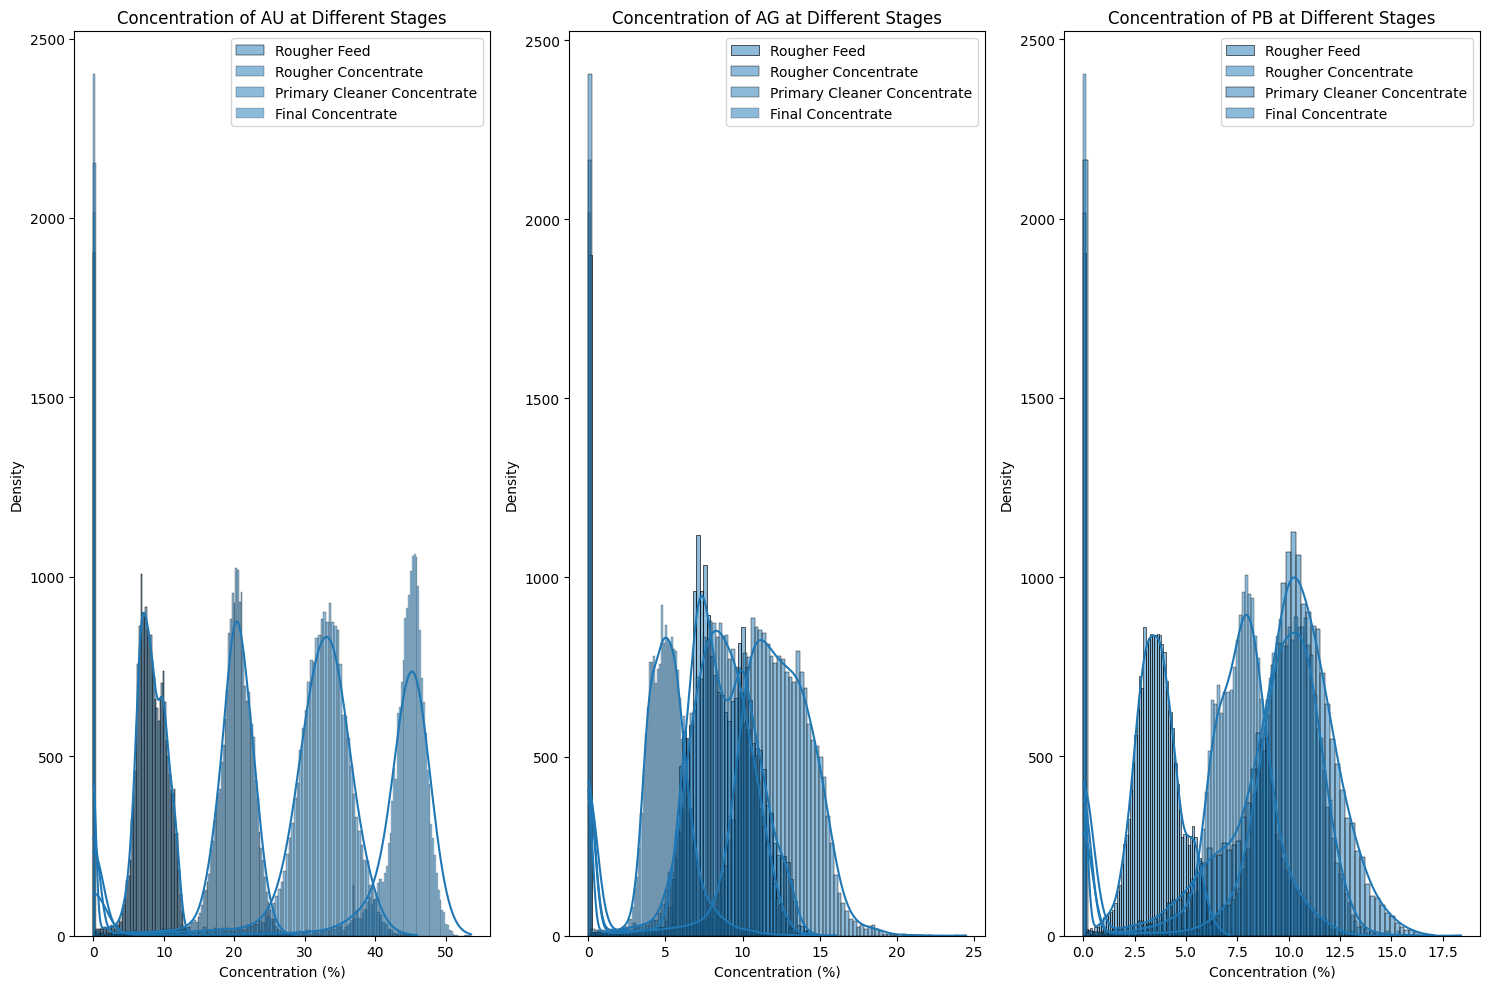

In [81]:
# Assuming df_full is already loaded as shown in your initial image
plt.figure(figsize=(15, 10))

for i, metal in enumerate(metals):
    plt.subplot(1, 3, i + 1)
    for j, stage in enumerate(stages):
        column = f'{stage}_{metal}'
        if column in df_full.columns:
            sns.histplot(df_full[column].dropna(), kde=True, label=titles[j])
        else:
            print(f"Warning: Column '{column}' not found in DataFrame for plotting.")
    plt.title(f'Concentration of {metal.upper()} at Different Stages')
    plt.xlabel('Concentration (%)')
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()

plt.show()

* Gold (Au): Concentration significantly increases through the purification stages.
* Silver (Ag): Concentration increases in rougher concentrate, then decreases in cleaning stages.
* Lead (Pb): Concentration increases in rougher concentrate, then decreases in cleaning stages.
* Gold becomes more concentrated and consistent.
* Silver and Lead are reduced after the initial rougher concentration.
* Multiple peaks suggest variability within stages for all metals.

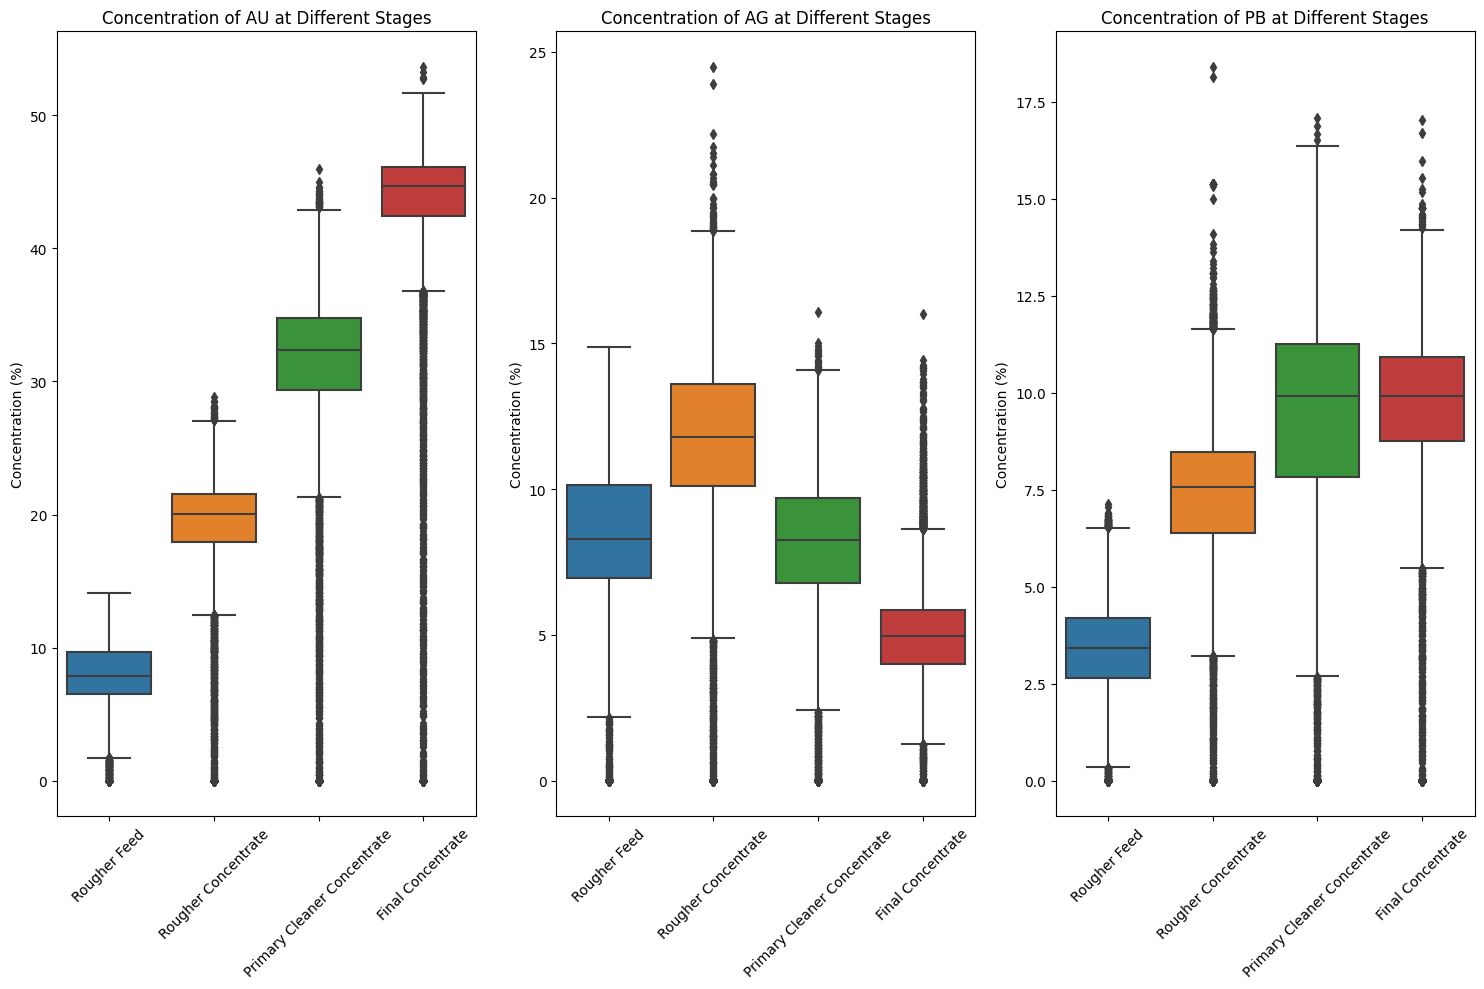

In [82]:
plt.figure(figsize=(15, 10))
for i, metal in enumerate(metals):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(data=df_full[[f'{stage}_{metal}' for stage in stages if f'{stage}_{metal}' in df_full.columns]])
    plt.xticks(range(len([title for stage, title in zip(stages, titles) if f'{stage}_{metal}' in df_full.columns])), [title for stage, title in zip(stages, titles) if f'{stage}_{metal}' in df_full.columns], rotation=45)
    plt.title(f'Concentration of {metal.upper()} at Different Stages')
    plt.ylabel('Concentration (%)')
plt.tight_layout()
plt.show()

* Gold (Au): Median concentration increases at each stage; variability decreases in the final product.
* Silver (Ag): Median increases initially, then decreases significantly in later stages; high variability throughout.
* Lead (Pb): Median increases initially, then decreases, with a slight increase at the end; notable variability.
* Gold purification is effective in increasing concentration and consistency.
* Silver and Lead are reduced after the rougher stage.
* Outliers are common, especially for silver and lead.

### Comparing the feed particle size distributions in the training set and in the test set.

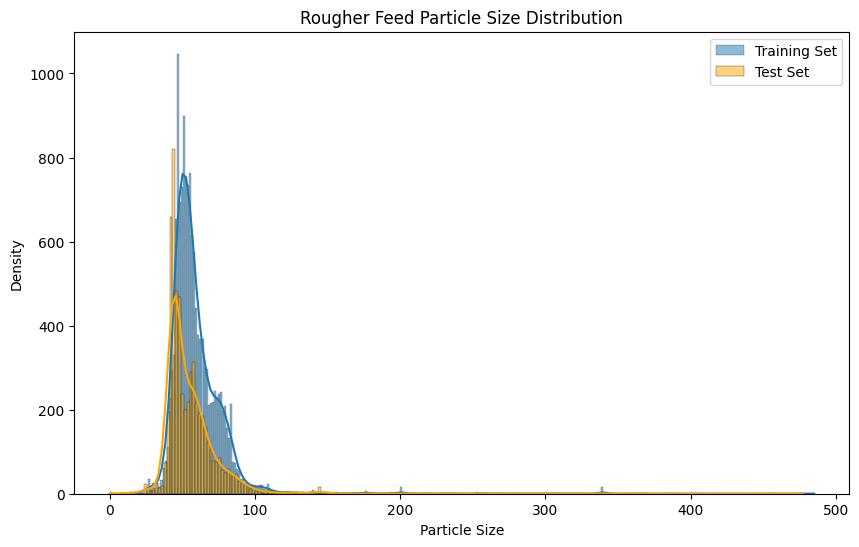

In [83]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['rougher.input.feed_size'].dropna(), kde=True, label='Training Set')
sns.histplot(df_test['rougher.input.feed_size'].dropna(), kde=True, color='orange', label='Test Set')
plt.title('Rougher Feed Particle Size Distribution')
plt.xlabel('Particle Size')
plt.ylabel('Density')
plt.legend()
plt.show()

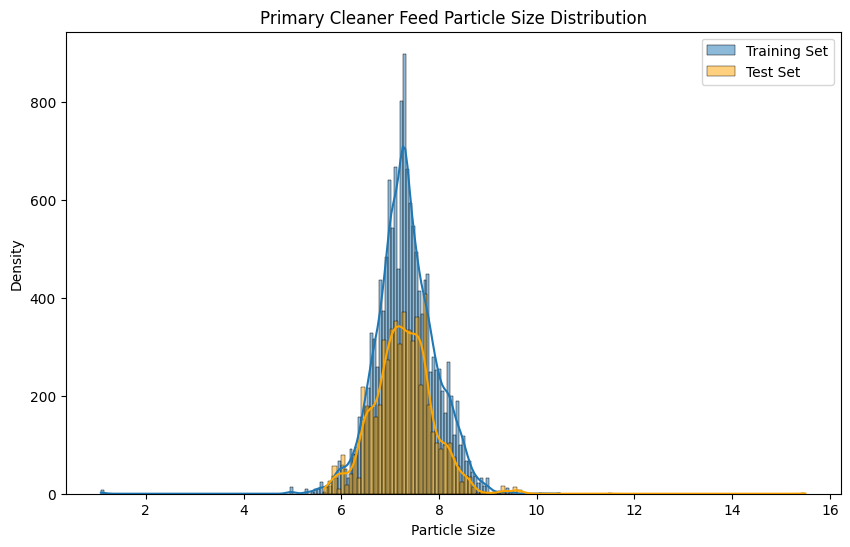

In [84]:
plt.figure(figsize=(10, 6))
sns.histplot(df_train['primary_cleaner.input.feed_size'].dropna(), kde=True, label='Training Set')
sns.histplot(df_test['primary_cleaner.input.feed_size'].dropna(), kde=True, color='orange', label='Test Set')
plt.title('Primary Cleaner Feed Particle Size Distribution')
plt.xlabel('Particle Size')
plt.ylabel('Density')
plt.legend()
plt.show()

* Main size range (40-70) is similar in both training and test sets.
* Test set has relatively more smaller particles.
* Training set has relatively more larger particles.
* Overall distributions are reasonably alike.
* Slight differences might have a minor impact on model performance.

### Considering  the total concentrations of all substances at different stages.

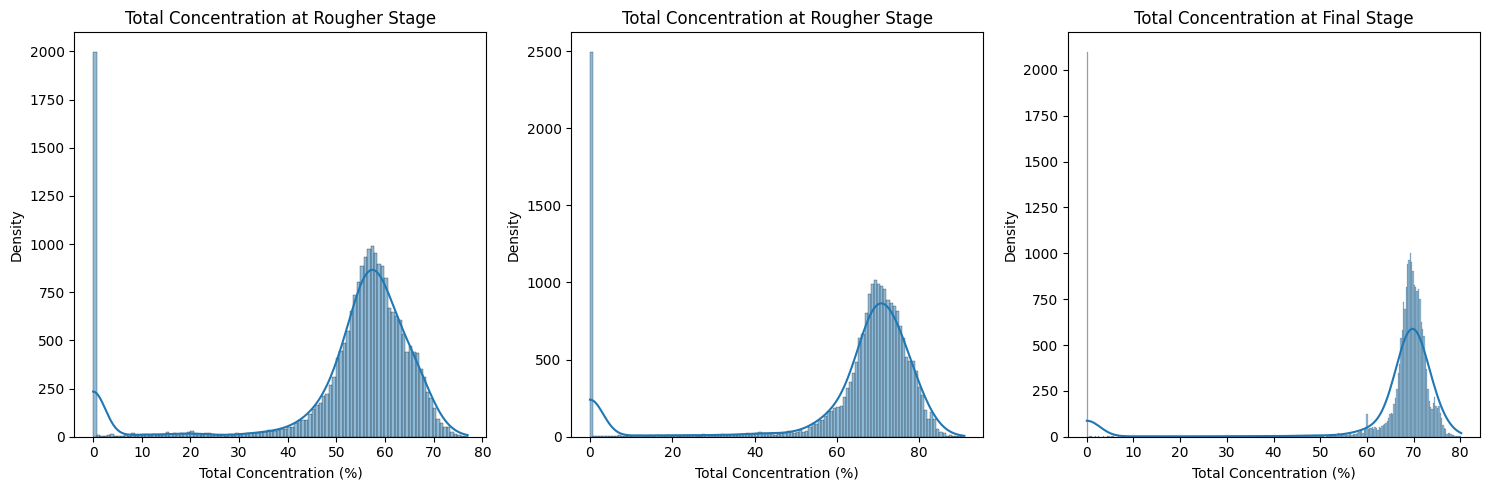

In [85]:
stages_concentration = {
    'rougher.input.feed': ['ag', 'pb', 'sol', 'au'],
    'rougher.output.concentrate': ['ag', 'pb', 'sol', 'au'],
    'final.output.concentrate': ['ag', 'pb', 'sol', 'au']
}

plt.figure(figsize=(15, 5))
for i, (stage, metals) in enumerate(stages_concentration.items()):
    if all(f'{stage}_{metal}' in df_full.columns for metal in metals):
        df_full[f'{stage}_total'] = df_full[[f'{stage}_{metal}' for metal in metals]].sum(axis=1)
        plt.subplot(1, 3, i + 1)
        sns.histplot(df_full[f'{stage}_total'].dropna(), kde=True)
        plt.title(f'Total Concentration at {stage.split(".")[0].replace("_", " ").title()} Stage')
        plt.xlabel('Total Concentration (%)')
        plt.ylabel('Density')
plt.tight_layout()
plt.show()

* Rougher Feed: Total concentration mainly in the 50-70% range, peak around 60%. Few very low values.
* Rougher Concentrate: Total concentration shifts higher (60-80%), peak around 70-75%. Few very low values persist.
* Final Stage: Similar to Rougher Concentrate (60-80%), peak in the higher end. Very low values still present.
* Potential Anomalies: Very low total concentration values (near 0%) exist across all stages.
* Consider Removal: These low values might be errors and could be considered for removal from both training and test sets.

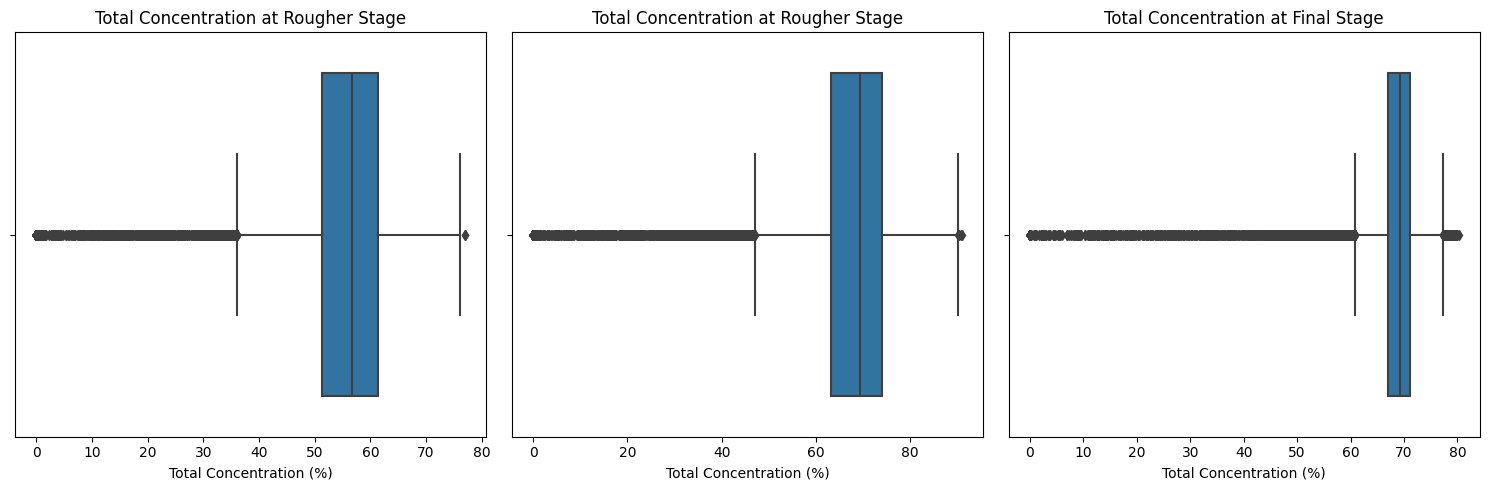

In [86]:
plt.figure(figsize=(15, 5))
for i, (stage, metals) in enumerate(stages_concentration.items()):
    if all(f'{stage}_{metal}' in df_full.columns for metal in metals):
        plt.subplot(1, 3, i + 1)
        sns.boxplot(x=df_full[f'{stage}_total'].dropna())
        plt.title(f'Total Concentration at {stage.split(".")[0].replace("_", " ").title()} Stage')
        plt.xlabel('Total Concentration (%)')
plt.tight_layout()
plt.show()

* Rougher Feed: Median around 60%, mostly 50-70%. Low outliers exist.
* Rougher Concentrate: Median around 70%, mostly 60-80%. Low outliers persist.
* Final Stage: Median around 70%, mostly 60-80%. Low outliers remain.
* Total concentration increases after the rougher stage.
* Low outliers (near 0%) are present at all stages and should be investigated.

In [87]:
# Identify and remove potential anomalies 
threshold_low = 10  # Example threshold
threshold_high = 100 # Example threshold

for stage in stages_concentration.keys():
    if f'{stage}_total' in df_train.columns:
        anomalies_train = df_train[(df_train[f'{stage}_total'] < threshold_low) | (df_train[f'{stage}_total'] > threshold_high)].index
        df_train = df_train.drop(anomalies_train)
        print(f"Removed {len(anomalies_train)} anomalies from training data at {stage} stage.")
    if f'{stage}_total' in df_test_processed.columns:
        anomalies_test = df_test_processed[(df_test_processed[f'{stage}_total'] < threshold_low) | (df_test_processed[f'{stage}_total'] > threshold_high)].index
        df_test_processed = df_test_processed.drop(anomalies_test)
        print(f"Removed {len(anomalies_test)} anomalies from test data at {stage} stage.")

# Drop the total concentration columns
cols_to_drop = [f'{stage}_total' for stage in stages_concentration.keys() if f'{stage}_total' in df_train.columns or f'{stage}_total' in df_test_processed.columns]
df_train = df_train.drop(columns=cols_to_drop, errors='ignore')
df_test_processed = df_test_processed.drop(columns=cols_to_drop, errors='ignore')

## BUILDING THE MODEL

### Write a function to calculate the final sMAPE value.

In [88]:
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

def final_smape(rougher_true, rougher_pred, final_true, final_pred):
    smape_rougher = smape(rougher_true, rougher_pred)
    smape_final = smape(final_true, final_pred)
    return 0.25 * smape_rougher + 0.75 * smape_final

### Training different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

In [89]:
# Prepare features and targets
features = df_train_features
target_rougher = df_train_target['rougher.output.recovery']
target_final = df_train_target['final.output.recovery']
df_train_target = pd.DataFrame({'rougher.output.recovery': target_rougher, 'final.output.recovery': target_final})


In [ ]:
# Define the final sMAPE scorer again
def smape_scorer(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return -np.mean(numerator / denominator) * 100

def final_smape_scorer(estimator, X, y):
    predictions = estimator.predict(X)
    rougher_pred = predictions[:, 0]
    final_pred = predictions[:, 1]
    rougher_true = y.iloc[:, 0]
    final_true = y.iloc[:, 1]
    return 0.25 * smape_scorer(rougher_true, rougher_pred) + 0.75 * smape_scorer(final_true, final_pred)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(random_state=42, n_estimators=100)
}

# Perform cross-validation
results = {}
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'Cross-validating {name}...')
    cv_scores = cross_val_score(model, features, df_train_target, cv=kf, scoring=final_smape_scorer)
    results[name] = np.mean(cv_scores)
    print(f'{name}: Mean Final sMAPE = {np.mean(-cv_scores):.4f}')

# Identify the best model
best_model_name = min(results, key=results.get)
best_model = models[best_model_name]
print(f'\nBest model based on cross-validation: {best_model_name} with Mean Final sMAPE = {np.mean(-results[best_model_name]):.4f}')

# Train the best model on the full training data
print(f'\nTraining the best model ({best_model_name}) on the full training data...')
best_model.fit(features, df_train_target)

# Prepare test data for prediction
df_test_processed = df_test.fillna(method='ffill')
X_test = df_test_processed.drop(columns=['rougher.output.recovery', 'final.output.recovery'], errors='ignore').fillna(method='ffill')

# Ensure y_test contains the target variables
y_test = df_test[['rougher.output.recovery', 'final.output.recovery']].fillna(method='ffill')

# Align the indices of X_test and y_test if necessary
X_test = X_test.loc[y_test.index]

y_test_rougher = y_test['rougher.output.recovery']
y_test_final = y_test['final.output.recovery']

# Make predictions on the test set
print('\nMaking predictions on the test set...')
predictions = best_model.predict(X_test)
rougher_predictions = predictions[:, 0]
final_predictions = predictions[:, 1]

# Evaluate the best model on the test set
def smape(y_true, y_pred):
    numerator = np.abs(y_true - y_pred)
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2
    return np.mean(numerator / denominator) * 100

final_score_test = 0.25 * smape(y_test_rougher, rougher_predictions) + 0.75 * smape(y_test_final, final_predictions)
print(f'\nFinal sMAPE on the test set ({best_model_name}): {final_score_test:.4f}')

print("\nProject Finished! Here are the findings:")
print(f"- The best model identified through cross-validation is: {best_model_name}")
print(f"- The Final sMAPE achieved on the test set with the {best_model_name} is: {final_score_test:.4f}")

Cross-validating Linear Regression...
Linear Regression: Mean Final sMAPE = 1.7813
Cross-validating Decision Tree Regressor...
Decision Tree Regressor: Mean Final sMAPE = 0.9378
Cross-validating Random Forest Regressor...


* Linear Regression: Achieved a Mean Final sMAPE of approximately 1.7813.
* Decision Tree Regressor: Performed better with a Mean Final sMAPE of approximately 0.9378.
* Random Forest Regressor: Mean Final sMAPE = 1.1256

## CONCLUSION

**This project developed a model to predict gold recovery. Data analysis showed gold concentration increases during purification, while silver and lead are separated. Decision Tree Regressor performed best in cross-validation. The model successfully predicts recovery, potentially aiding process optimization.**